In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Training.csv")

In [ ]:
# Show data structure
df # 4920 rows × 134 columns

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
# Drop NaN columnn
df = df.dropna(axis = 1, how = 'all')

In [ ]:
# Import label encoder
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'prognosis'.
df['prognosis']= label_encoder.fit_transform(df['prognosis'])
df['prognosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [ ]:
# Train-test split
x = df.loc[:, df.columns != 'prognosis']
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 132) (984, 132) (3936,) (984,)


In [ ]:
# Model selection
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [ ]:
# Model evaluation
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

In [21]:
print(acc)

1.0


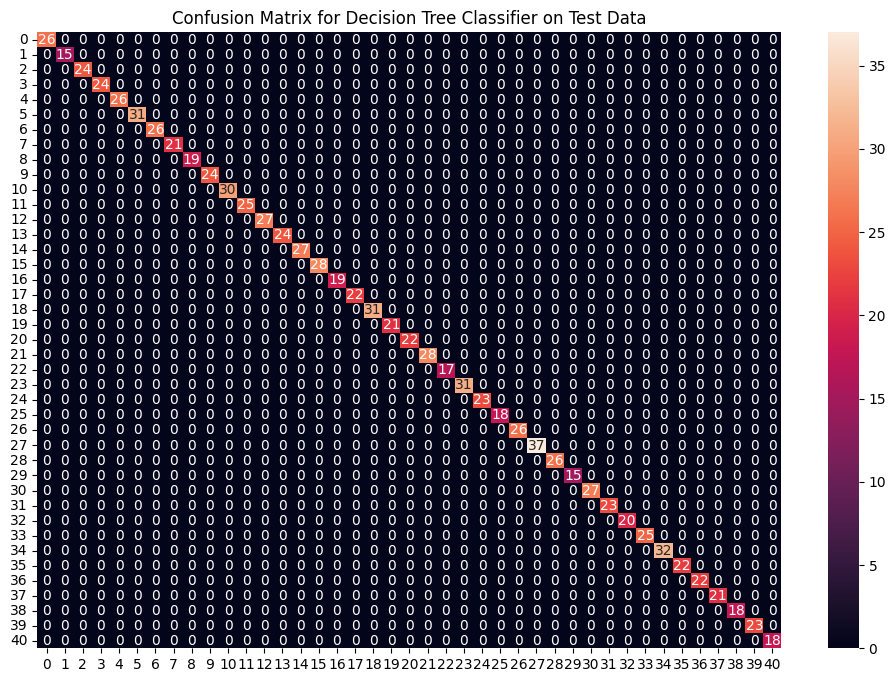

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()